In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # use to display images in a specific colormap
import imageio # use to read image

from random import sample # use for random initialization
from PIL import Image
from scipy import linalg, io # linalg -> use for 'SVD' function

In [4]:
# K-Means clustering => k 个clusters

# find the centroids
"""
c(i) := j that minimizes ||x(i) − μj||^2

where c(i) is the index of the centroid 
that is closest to x(i), 
and μj is the position (value) of the j’th centroid.

1、每个点找到自己距离最近的centroid，并将自己分到该个cluster
2、每个族重新重新计算各自centroid位置，然后循环步骤1，2
"""

'\nc(i) := j that minimizes ||x(i) − μj||^2\n\nwhere c(i) is the index of the centroid \nthat is closest to x(i), \nand μj is the position (value) of the j’th centroid.\n\n1、每个点找到自己距离最近的centroid，并将自己分到该个cluster\n2、每个族重新重新计算各自centroid位置，然后循环步骤1，2\n'

In [76]:
# read data set
mat = io.loadmat('data/ex7data2.mat')
X = mat['X'] # 300x2 matrix

In [6]:
# Choose the number of centroids... K = 3
K = 3 # K个聚合中心 -》 k组

# 自定义centroids
# Choose the initial centroids matching ex7.m assignment script
initial_centroids = np.array([[3,3], [6,2], [8,5]])


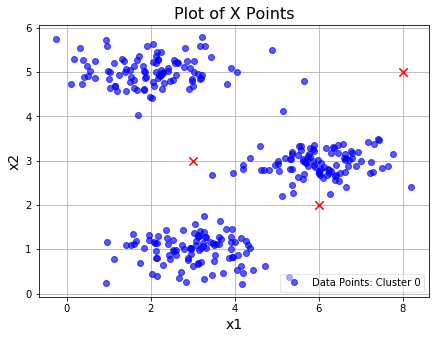

In [21]:
# visualizing the data
def plotData(X, centroids, idxs=None):
    """
    function to plot the data and color it accordingly.
    
    idx should be the latest iteration index vector
    centroid should be a vector of centroids, one per iterations
    """
    
    colors = ['b', 'g', 'gold', 'darkorange', 'salmon', 'olivedrab']
    
    if idxs is not None:
        subX = []
        for x in range(centroids[0].shape[0]):
            subX.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    else:
        subX = [X] 
    
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        new_X = subX[x]
        # X -> X1, Y -> X2
        plt.plot(new_X[:,0], new_X[:,1], 'o', color=colors[x],
                 alpha=0.65, label='Data Points: Cluster %d'%x)
    
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)
                       
    # draw a history of centroid movement
    temp_X, temp_Y = [], []
    for centroid in centroids:
        temp_X.append(centroid[:,0])
        temp_Y.append(centroid[:,1])
    
    for x in range(len(temp_X[0])):
        plt.plot(temp_X, temp_Y, 'rx--', markersize=8)
        
    plt.legend(loc=4, framealpha=0.5)
    
plotData(X, [initial_centroids])

In [12]:
# a wrapper function -> 封装计算两个点距离(x1-x2)^2+(y1-y2)^2
def distance(point1, point2):
    return np.sum(np.square(point1 - point2))

In [22]:
# 根据距离找到最近的质心
def findClosestCentroids(X, centroids):
    """
    function takes in the (m,n) X matrix
    (where m is the No. of the poins, n is No.of features per point)
    and (K,n) centroid seed matrix
    (where k is the No. of the centroids(clusters))
    
    and returns a (m,1) vector of cluster indices per point in X
    """
    
    # 记录每个点所属的centorid的index
    idxs = np.zeros((X.shape[0], 1))
    
    # loop through each data point in X
    for x in range(idxs.shape[0]):
        point = X[x]
        
        # compare the point to each centroid
        # keep track of shortest distacne and index of shortest distance
        minDist, idx = 999999, 0
        
        # 分别计算每个点到centroid的距离，然后将该点分到最近的那个centroid
        for i in range(centroids.shape[0]):
            centroid = centroids[i,:]
            temp_min_dis = distance(point, centroid)
            if temp_min_dis < minDist:
                idx = i
                minDist = temp_min_dis
                
        idxs[x] = idx 
        
    return idxs
    

In [23]:
idxs = findClosestCentroids(X, initial_centroids)
print (idxs[:3].flatten())

[0. 2. 1.]


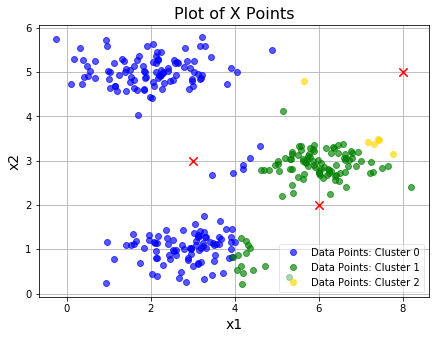

In [24]:
# plot
plotData(X, [initial_centroids], idxs)

In [89]:
# computing centroid means
def computeCentroids(X, idxs):
    """
    function takes in the X matrix and the index vector
    and compute a new centroid matrix
    """
    subX = []
    # 将对应的不同的centroid的points分割好
    for x in range(len(np.unique(idxs))):
        subX.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
#     print (len(subX))
    return np.array([np.mean(thisX, axis=0) for thisX in subX])


In [90]:
# K-means on example dataset + history
def runKMeans(X, initial_centroids, K, n_iter):
    """
    function that acutally do
    """
    centroid_his = []
    current_centroids = initial_centroids
    
    for i in range(n_iter):
        centroid_his.append(current_centroids)
        idxs = findClosestCentroids(X, current_centroids)
        current_centroids = computeCentroids(X, idxs)
    
    return idxs, centroid_his
    

3
3
3
3
3
3
3
3
3
3


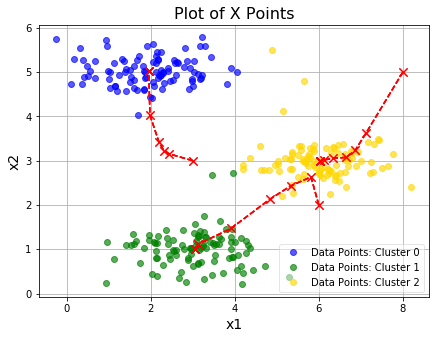

In [91]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])
idxs, centorid_history = runKMeans(X, initial_centroids, K=3, n_iter=10)
plotData(X, centorid_history, idxs)

In [34]:
# random initialization -> centroids
def chooseKRandomCentroids(X, K):
    # sample(range(0, X.shape[0]), K) -> 从0-X.shape[0]，任意选取K个值
    rand_indices = sample(range(0, X.shape[0]), K)
    return np.array([X[i] for i in rand_indices])

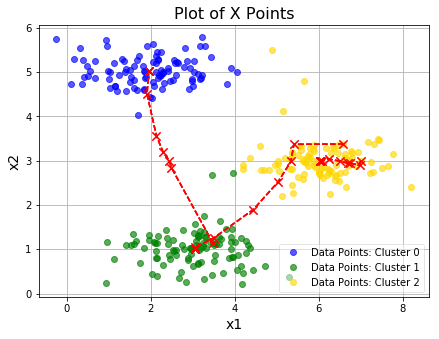

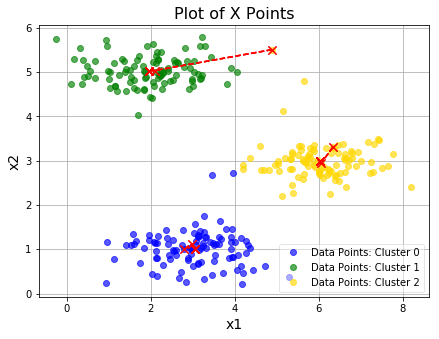

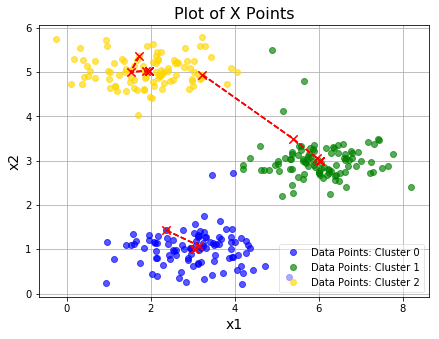

In [35]:
# plot random
for x in range(3):
    idxs, centorid_history = runKMeans(X, chooseKRandomCentroids(X, K=3), K=3, n_iter=10)
    plotData(X, centorid_history, idxs)
    

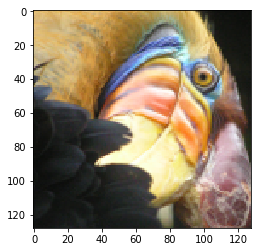

In [56]:
# image compression with K-means
img = imageio.imread('data/bird_small.png')
plt.imshow(img)

In [57]:
# normalization
# divide every entry in img by 255 so all values are in the range of 0 - 1 
img = img / 255.

# unroll the img to shape (16384 = 128*128,3)
img = img.reshape(-1, 3)


In [58]:
# run K-means on this data, forming 16 clusters, with random initialization
K = 16
idxs, centorid_history = runKMeans(img, chooseKRandomCentroids(img, K), K, n_iter=10)

idxs = findClosestCentroids(img, centorid_history[-1])

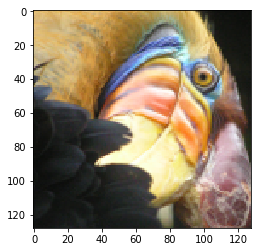

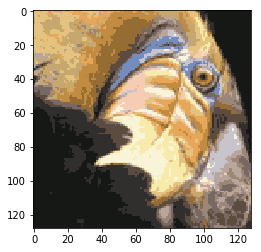

In [59]:
final_centroids = centorid_history[-1]

final_img = np.zeros((idxs.shape[0], 3))

for x in range(final_img.shape[0]):
    final_img[x] = final_centroids[int(idxs[x])]

plt.figure()
plt.imshow(img.reshape(128, 128, 3))
plt.figure()
plt.imshow(final_img.reshape(128, 128, 3))

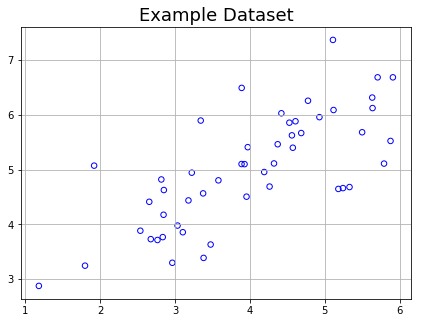

In [60]:
# PCA Principal Component Analysis

mat = io.loadmat('data/ex7data1.mat')
X = mat['X']

# quick plot
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0],X[:,1],s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset",fontsize=18)
plt.grid(True)


In [64]:
"""
before using PCA, it is important to first normalize the data 
by stubtracting the mean value of each feature from dataset
and scaling each dimension so taht they are in the same range
"""

# 对列特征数据进行归一化处理
def featureNormalize(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    X_norm = (X - means) / stds
    
    return X_norm, means, stds


In [65]:
def getUSV(X_norm):
    # compute the convariance matrix
    # X * X / m
    conv_matrix = X_norm.T.dot(X_norm) / X_norm.shape[0]
    
    # run single value decomposition to get the U principal component matrix
    # SVD 奇异值分解
    U, S, V = linalg.svd(conv_matrix, full_matrices=True, compute_uv=True)
    
    return U, S, V
    

In [67]:
# run svd
X_norm, means, stds = featureNormalize(X)
U, S, V = getUSV(X_norm)

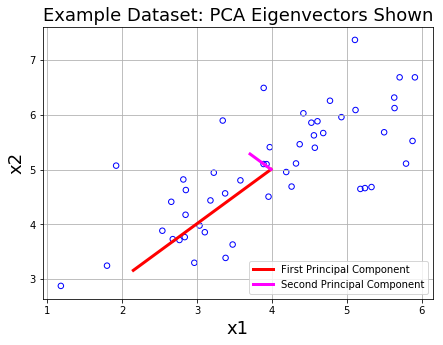

In [68]:
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)

# To draw the principal component, you draw them starting 
# at the mean of the data
plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)

In [100]:
# dimensinality reduction with PCA
def projectData(X, U, K):
    """
    function that computes the reduced data representation when
    projecting only onto the top "K" eigenvectors
    
    U => principal component PCA
    将x中的每个示例投影到U中的前k个组件上
    """
    
    # reduced U is the first "K" columns in U
    Ureduced = U[:, :K]
    z = np.dot(X, Ureduced)
    return z
    

In [101]:
z = projectData(X_norm, U, 1)
print ('Projection of the first example is %0.3f.'%float(z[0]))


Projection of the first example is 1.496.


In [102]:
# reconstructing an approximation of the data
def recoverData(Z, U, K):
    """
    approximately recover the data by projecting
    them back onto the original high dimensinal space
    """
    Ureduced = U[:, :K]
    X_approx = np.dot(z, Ureduced.T)
    return X_approx
    

In [103]:
X_rec = recoverData(z,U,1)
print ('Recovered approximation of the first example is ',X_rec[0])


Recovered approximation of the first example is  [-1.05805279 -1.05805279]


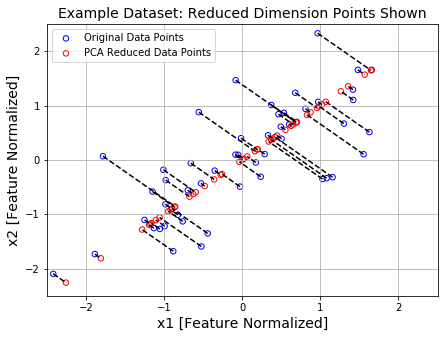

In [104]:
# visulaizing
# quick plot, drawing projected points to the original points
plt.figure(figsize=(7,5))
# original points 原始点
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
# projected points 映射后的点
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0], X_rec[x,0]], [X_norm[x,1], X_rec[x,1]], 'k--')
    
leg = plt.legend()

# Force square axes to make projections look better
# 设置一个方形的区间
dummy = plt.xlim((-2.5,2.5))
dummy = plt.ylim((-2.5,2.5))

In [11]:
a,b = np.array([1,2]), np.array([2,4])
print (np.sum(np.square(a-b)))

5


In [14]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])
print (initial_centroids[0,:])

[3 3]
